

# Project: Study of the nutritional aspects of world population

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this study, we will analyze the extracted data from Gapminder. Gapminder provided an indicators list related to health parameters, nutrition and economy of populations from various countries. 


> To manage that, we selected a data set that shows the amount of sugar ingested per person per day and imported this information as 'sugar_per_person_g_per_day'. Furthermore, we also obtained the data about the Gross domestic product (GDP) and imported it as 'gdppercapita_us' and lastly, we obtained a data set about financial health spending and we refered to that as 'health_spending'. 

> Thereby, we hope to be able to answer if
>(1) there is a correlation between sugar consumption and health spending or 
>(2) there is a correlation between sugar consumption and GPD. 
> Other secondary issues will also be addressed, for example, if (3) there is any trend to decrease sugar consumption in the world. Let's see what the data will bring to us!



In [41]:
#importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling
The first step is about loading the indicators datas and create the 'year' variable. 
### General Properties

In [42]:
#loading sugar_data 
sugar_data = pd.read_csv('sugar_per_person_g_per_day.csv')
sugar_data.shape

(168, 54)

In [43]:
#transforming 'year' into a variable from sugar_data
sugar_data = pd.melt(sugar_data, 
                 id_vars=['country'], var_name = 'year', 
                     value_name = 'sugar_per_person_g_per_day')
sugar_data

,country,year,sugar_per_person_g_per_day
0,Afghanistan,1961,14.4
1,Albania,1961,31.0
2,Algeria,1961,45.0
3,Angola,1961,25.2
4,Antigua and Barbuda,1961,1140.0
...,...,...,...
8899,Venezuela,2013,106.0
8900,Vietnam,2013,27.4
8901,Yemen,2013,77.9
8902,Zambia,2013,28.1


In [44]:
#transforming 'year' into a variable from gdpercapita
gdpercapita = pd.read_csv('gdppercapita_us_inflation_adjusted.csv')
gdpercapita = pd.melt(gdpercapita, 
                 id_vars=['country'], var_name = 'year', 
                     value_name = 'gdppercapita_us')
gdpercapita

,country,year,gdppercapita_us
0,Afghanistan,1960,NaN
1,Albania,1960,NaN
2,Algeria,1960,2480.0
3,Andorra,1960,NaN
4,Angola,1960,NaN
...,...,...,...
11455,Venezuela,2019,NaN
11456,Vietnam,2019,2080.0
11457,Yemen,2019,NaN
11458,Zambia,2019,1660.0


In [45]:
# transforming 'year' into a variable from health_spending
health_spending = pd.read_csv('out_of_pocket_share_of_total_health_spending_percent.csv')
health_spending = pd.melt(health_spending, 
                 id_vars=['country'], var_name = 'year', 
                     value_name = 'health_spending')
health_spending.head()

,country,year,health_spending
0,Afghanistan,1995,NaN
1,Albania,1995,0.500
2,Algeria,1995,0.239
3,Andorra,1995,0.267
4,Angola,1995,0.132


#### So, we can merge these data sets and create a unique dataset which contains our three indicators. 

In [46]:
# merging the data sets 
sugar_gd = pd.merge(sugar_data, gdpercapita, on = ["country", "year"])
sugar_gd
data = pd.merge(sugar_gd, health_spending, on = ["country", "year"])
data

,country,year,sugar_per_person_g_per_day,gdppercapita_us,health_spending
0,Afghanistan,1995,8.45,NaN,NaN
1,Albania,1995,54.40,1700.0,0.5000
2,Algeria,1995,70.60,3240.0,0.2390
3,Angola,1995,23.50,1920.0,0.1320
4,Antigua and Barbuda,1995,89.30,11200.0,0.2920
...,...,...,...,...,...
2027,Vanuatu,2010,54.70,2970.0,0.0533
2028,Vietnam,2010,28.70,1320.0,0.5760
2029,Yemen,2010,78.60,1330.0,0.7480
2030,Zambia,2010,28.00,1490.0,0.2650




### Data Cleaning (Replace this with more specific notes!)

There may be some missing or even duplicated data. Let's check this out and ajust.

In [47]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
sum(data.duplicated())

0

In [48]:
#check missing data
pd.isnull(data)

,country,year,sugar_per_person_g_per_day,gdppercapita_us,health_spending
0,False,False,False,True,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2027,False,False,False,False,False
2028,False,False,False,False,False
2029,False,False,False,False,False
2030,False,False,False,False,False


In [49]:
#fill empty columns with average
data.fillna(data.mean(), inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 -  Is there a correlation between sugar consumption and health spending?

### Research Question 2 - Is there a correlation between sugar consumption and GPD?

In [50]:
# To find the correlation among 
# the columns using pearson method 
data.corr(method ='pearson') 

,sugar_per_person_g_per_day,gdppercapita_us,health_spending
sugar_per_person_g_per_day,1.000000,0.627849,-0.473242
gdppercapita_us,0.627849,1.000000,-0.475630
health_spending,-0.473242,-0.475630,1.000000


The Pearson method showed a moderate positive correlation between sugar consumption and GPD. On the other hand, we found a negative correlation between sugar_per_person_g_per_day.  We can illustrate the results of the pearson coefficient by plotting the scatter plot graph.

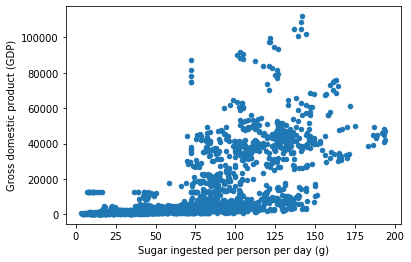

In [51]:
#illustrating the correlation with scatter chart graph
data.plot(x = 'sugar_per_person_g_per_day', y = 'gdppercapita_us', kind = 'scatter')
plt.ylabel('Gross domestic product (GDP)')
plt.xlabel('Sugar ingested per person per day (g)');

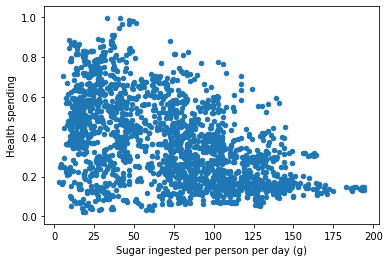

In [52]:
#illustrating the correlation with scatter chart graph
data.plot(x = 'sugar_per_person_g_per_day', y = 'health_spending', kind = 'scatter')
plt.ylabel('Health spending')
plt.xlabel('Sugar ingested per person per day (g)');

It is interesting to see the positive and negative correlation.

### Research Question 3 - Is there any trend to decrease sugar consumption in the world? 

Is there any trend to decrease sugar consumption in the world? The world's average sugar consumption per year can bring some answer for us about this issue. 

Text(0, 0.5, 'Sugar per person per day (g)')

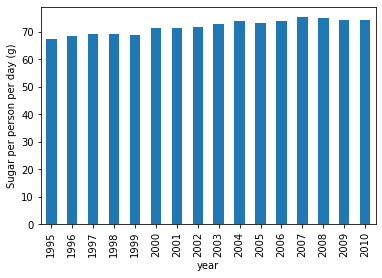

In [53]:
# plot between 'year variable' and sugar average per day per person in the whole world
data['country'].value_counts()
data.groupby(['year'])['sugar_per_person_g_per_day'].mean().plot(kind='bar');
plt.ylabel('Sugar per person per day (g)')

It is possible to see an annual increase in the consumption of sugar worldwide. An average table may be more accurate.

In [54]:
data.groupby(['year'])['sugar_per_person_g_per_day'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1995,127.0,67.303899,42.173548,4.61,27.20,67.700000,102.00,183.0
1996,127.0,68.512167,42.012229,5.14,28.65,71.991305,102.50,186.0
1997,127.0,69.198939,42.061798,6.07,30.90,71.991305,100.50,193.0
1998,127.0,69.192010,41.657317,8.34,30.50,71.900000,100.25,194.0
1999,127.0,68.912167,41.593348,7.18,30.90,71.991305,101.00,188.0
2000,127.0,71.296241,43.282158,3.97,30.85,72.600000,105.00,189.0
2001,127.0,71.612383,42.728772,7.64,31.80,72.900000,104.50,186.0
2002,127.0,71.847737,42.428564,6.02,34.25,74.000000,102.50,193.0
2003,127.0,72.904430,42.851912,5.48,34.50,75.000000,104.50,192.0


The last code showed us what happened with sugar content average per person per day in the whole world. However, what if that is not an absolute truth for countries like Brazil, U.S or France? let's take a close look. 

In [55]:
france = data.query('country == "France"')
france.groupby(['year'])['sugar_per_person_g_per_day'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1995,1.0,102.0,NaN,102.0,102.0,102.0,102.0,102.0
1996,1.0,106.0,NaN,106.0,106.0,106.0,106.0,106.0
1997,1.0,107.0,NaN,107.0,107.0,107.0,107.0,107.0
1998,1.0,110.0,NaN,110.0,110.0,110.0,110.0,110.0
1999,1.0,112.0,NaN,112.0,112.0,112.0,112.0,112.0
2000,1.0,109.0,NaN,109.0,109.0,109.0,109.0,109.0
2001,1.0,112.0,NaN,112.0,112.0,112.0,112.0,112.0
2002,1.0,113.0,NaN,113.0,113.0,113.0,113.0,113.0
2003,1.0,111.0,NaN,111.0,111.0,111.0,111.0,111.0


Text(0, 0.5, 'Sugar per person per day (g) - France')

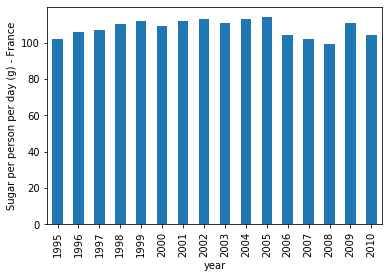

In [56]:
france.groupby(['year'])['sugar_per_person_g_per_day'].mean().plot(kind='bar');
plt.ylabel('Sugar per person per day (g) - France')

It seems that we really do not have the same pattern for France that we see for the world. How about U.S.A?

In [57]:
#convert country column to string type
data['country'].astype(str)

0               Afghanistan
1                   Albania
2                   Algeria
3                    Angola
4       Antigua and Barbuda
               ...         
2027                Vanuatu
2028                Vietnam
2029                  Yemen
2030                 Zambia
2031               Zimbabwe
Name: country, Length: 2032, dtype: object

In [58]:
#find 'United States' 
data[data['country'].str.contains("United States")]

,country,year,sugar_per_person_g_per_day,gdppercapita_us,health_spending
120,United States,1995,183.0,38400.0,0.146
247,United States,1996,186.0,39400.0,0.144
374,United States,1997,193.0,40600.0,0.147
501,United States,1998,194.0,41900.0,0.150
628,United States,1999,188.0,43400.0,0.148
755,United States,2000,189.0,44700.0,0.145
882,United States,2001,186.0,44700.0,0.138
1009,United States,2002,193.0,45100.0,0.134
1136,United States,2003,192.0,46000.0,0.137
1263,United States,2004,194.0,47300.0,0.134


In [59]:
usa = data.query('country == "United States"')
usa.groupby(['year'])['sugar_per_person_g_per_day'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1995,1.0,183.0,NaN,183.0,183.0,183.0,183.0,183.0
1996,1.0,186.0,NaN,186.0,186.0,186.0,186.0,186.0
1997,1.0,193.0,NaN,193.0,193.0,193.0,193.0,193.0
1998,1.0,194.0,NaN,194.0,194.0,194.0,194.0,194.0
1999,1.0,188.0,NaN,188.0,188.0,188.0,188.0,188.0
2000,1.0,189.0,NaN,189.0,189.0,189.0,189.0,189.0
2001,1.0,186.0,NaN,186.0,186.0,186.0,186.0,186.0
2002,1.0,193.0,NaN,193.0,193.0,193.0,193.0,193.0
2003,1.0,192.0,NaN,192.0,192.0,192.0,192.0,192.0


Text(0, 0.5, 'Sugar per person per day (g) - United States')

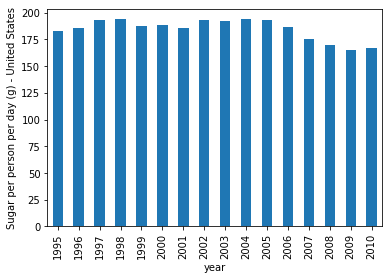

In [60]:
usa.groupby(['year'])['sugar_per_person_g_per_day'].mean().plot(kind='bar');
plt.ylabel('Sugar per person per day (g) - United States')

It is also not possible to see a trend of increasing sugar consumption as clear as it was worldwide.

<a id='conclusions'></a>
## Conclusions

>Some findings about correlation between variables are interesting and maybe predictable as there are studies related to high sugar consumption with health issues like obesity, diabetes and other disease (correlation  between health_spending and sugar_per_person = -0.473242). 
>Despite the low consumption of sugar is related to saving money on health, it is not possible to affirm the causation existence. 
This is because there could be intervening variables that corroborate for this negative correlation.  The correlation between 

>Another curious question is about the relationship with a country's wealth and sugar consumption. There seems to be a trend that richer countries also increase sugar consumption as we have 0.627849 for this correlation.

>When assessing the trend of increasing world consumption over time, we note that this is true. In 2010 the average consumption of sugar is 10% higher than the average consumption in 1995. This trend is not true for every country in the world. The graph behavior is different for France for example and it is possible to observe that sugar consumption in France is higher than the world average. The same happened to U.S.A. 

>### Limitations 
 

>* As mentioned before, must exist other variables involved in the relationship between health spending and sugar consumption per person. So, we can not presume causality.

>*  There are missing data that were filled in with the average just in order to make the analysis possible

>*  The analyzes could be better developed if a data set of diseases related to sugar consumption were used. However, the analysis would be more complex due to the difference in response because of the genres.

>* It is important to remember that there are deviations and inequality in the distribution of some factors, such as in the economy.


